# Prédictions des matchs de ligue 1

## Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Chargement des fichiers csv :

In [ ]:
clubs_fr = pd.read_csv("clubs_fr.csv")
game_events = pd.read_csv("game_events.csv")
game_lineups = pd.read_csv("game_lineups.csv")
match_2023 = pd.read_csv("match_2023.csv")
matchs_2013_2022 = pd.read_csv("matchs_2013_2022.csv")
player_appearance = pd.read_csv("player_appearance.csv")
player_valuation_before_season = pd.read_csv("player_valuation_before_season.csv")
sample_results = pd.read_csv("sample_results.csv")
prediction_example = pd.read_csv("prediction_example.csv")

<ipython-input-2-e9cae2e12688>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  game_lineups = pd.read_csv("game_lineups.csv")


### Aperçu des fichiers

 Ceci nous permet de mieux comprendre les données contenues dans les fichiers avec lesquels nous travaillons.

In [ ]:
datasets = {
    'clubs_fr': clubs_fr,
    'match_2013_2022': matchs_2013_2022,
    'match_2023': match_2023,
    'game_events': game_events,
    'game_lineups': game_lineups,
    'player_appearance': player_appearance,
    'player_valuation_before_season': player_valuation_before_season,
    'sample_results': sample_results
}

for name, df in datasets.items():
    print(f"\n {name} — {df.shape[0]} lignes / {df.shape[1]} colonnes")
    display(df.head(2)) #affichage du nom, du nombre de lignes, du nombre de colonnes et des deux premières lignes de chaque fichier


 clubs_fr — 35 lignes / 13 colonnes


,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name
0,969,montpellier-hsc,Montpellier Hérault Sport Club,FR1,25,25.7,12,48.0,8,Stade de la Mosson,32939,+€28.60m,NaN
1,1082,losc-lille,Lille Olympique Sporting Club Lille Métropole,FR1,25,25.4,18,72.0,7,Decathlon Arena-Stade Pierre-Mauroy,50186,+€3.65m,NaN



 match_2013_2022 — 4078 lignes / 23 colonnes


,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,results
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,Stade Geoffroy-Guichard,31952.0,Antony Gautier,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,domestic_league,0
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,Parc des Sports d’Annecy,8620.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,domestic_league,-1



 match_2023 — 270 lignes / 12 colonnes


,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,competition_type
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,Racing Club de Lens,domestic_league
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,Football Club de Metz,domestic_league



 game_events — 40995 lignes / 11 colonnes


,Unnamed: 0,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,6816,5d2b67957aaae6cf2a41e70cb5d4024f,2012-09-22,2223841,73,Substitutions,3911,5399,", Not reported",37516.0,NaN
1,6817,cd511880b945623db06ace57349e45b2,2012-09-22,2223841,76,Goals,3911,24459,", Penalty, 2. Goal of the Season Assist: , Fou...",NaN,24459.0



 game_lineups — 137132 lignes / 11 colonnes


,Unnamed: 0,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,34475,be6532aeff4c40b06e6e0da142da7dd8,2013-08-24,2330825,4811,969,Hilton,starting_lineup,Centre-Back,4,1
1,34476,4b10516c5bf9b2dfac0435c7c2bbf872,2013-08-24,2330825,5303,969,Souleymane Camara,starting_lineup,Left Winger,19,0



 player_appearance — 115182 lignes / 13 colonnes


,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2229837_108830,2229837,108830,415,3205,2012-08-10,Aymen Abdennour,FR1,1,0,0,0,90
1,2229837_113707,2229837,113707,969,1082,2012-08-10,Rémy Cabella,FR1,1,0,0,0,42



 player_valuation_before_season — 30215 lignes / 5 colonnes


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,773,2004-10-04,3500000,14171,FR1
1,1327,2004-10-04,4000000,1159,FR1



 sample_results — 270 lignes / 2 colonnes


,game_id,results
0,4094596,1
1,4094622,1


### Cartographie et documentation des sources

Ceci est très utile car cela nous permet de visualiser rapidement le contenu des fichiers et les éventuelles jointures possibles entre les fichiers. Cette étape est très importante pour la suite du projet puisqu'elle va nous permettre de mieux comprendre les csv mis à notre disposition et ainsi nous pourrons mieux les exploiter.

| Fichier                          | Contenu principal                                                                                                                        | Clés de jointure (colonnes)                                                                                                                                                       |
|----------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **clubs_fr**                     | Détails des clubs de Ligue 1 (fr) : identifiants, codes, noms, effectif, âge moyen, étrangers, stade, mercato, entraîneur…              | `club_id` → `match_2013_2022.home_club_id` / `away_club_id`, `match_2023.home_club_id` / `away_club_id`, `game_events.club_id`, `game_lineups.club_id`, `player_appearance.player_club_id` / `player_current_club_id`, `player_valuation_before_season.current_club_id` |
| **match_2013_2022**              | Résultats des matchs de Ligue 1 de 2013 à 2022 : `game_id`, saison, journée, date, clubs à domicile/extérieur, score, classement…        | `game_id` → `game_events.game_id`, `game_lineups.game_id`, `player_appearance.game_id`, `sample_results.game_id`<br>`home_club_id` / `away_club_id` → `clubs_fr.club_id`          |
| **match_2023**                   | Résultats et contexte des matchs de la saison 2023 : `game_id`, date, clubs, managers, stade, affluence, arbitre, type de compétition…   | `game_id` → `game_events.game_id`, `game_lineups.game_id`, `player_appearance.game_id`, `sample_results.game_id`<br>`home_club_id` / `away_club_id` → `clubs_fr.club_id`          |
| **game_events**                  | Événements de match (buts, cartons, remplacements…) : `game_event_id`, `game_id`, minute, type, `club_id`, `player_id`, description…   | `game_id` → `match_2013_2022.game_id`, `match_2023.game_id`<br>`club_id` → `clubs_fr.club_id`<br>`player_id` → `player_appearance.player_id`, `player_valuation_before_season.player_id` |
| **game_lineups**                 | Composition d’équipes : `game_lineups_id`, `game_id`, `player_id`, `club_id`, nom, type (titulaire/remplaçant), poste, n°, capitaine…   | `game_id` → `match_2013_2022.game_id`, `match_2023.game_id`<br>`club_id` → `clubs_fr.club_id`<br>`player_id` → `player_appearance.player_id`                                         |
| **player_appearance**            | Statistiques individuelles par match : `appearance_id`, `game_id`, `player_id`, `player_club_id`, `player_current_club_id`, cartons…   | `game_id` → `match_2013_2022.game_id`, `match_2023.game_id`<br>`player_club_id` / `player_current_club_id` → `clubs_fr.club_id`<br>`player_id` → `game_events.player_id`, `game_lineups.player_id`, `player_valuation_before_season.player_id` |
| **player_valuation_before_season** | Valeur de marché des joueurs avant chaque saison : `player_id`, date, valeur en €, `current_club_id`, compétition domestique…            | `player_id` → `player_appearance.player_id`, `game_events.player_id`, `game_lineups.player_id`<br>`current_club_id` → `clubs_fr.club_id`                                           |
| **sample_results**               | Résultats binaires (1/0) pour un échantillon de matchs (ici : saison 2023) : `game_id`, `results`                                        | `game_id` → `match_2023.game_id`, `match_2013_2022.game_id`                                                                                                                                  |

## Visualisation des données

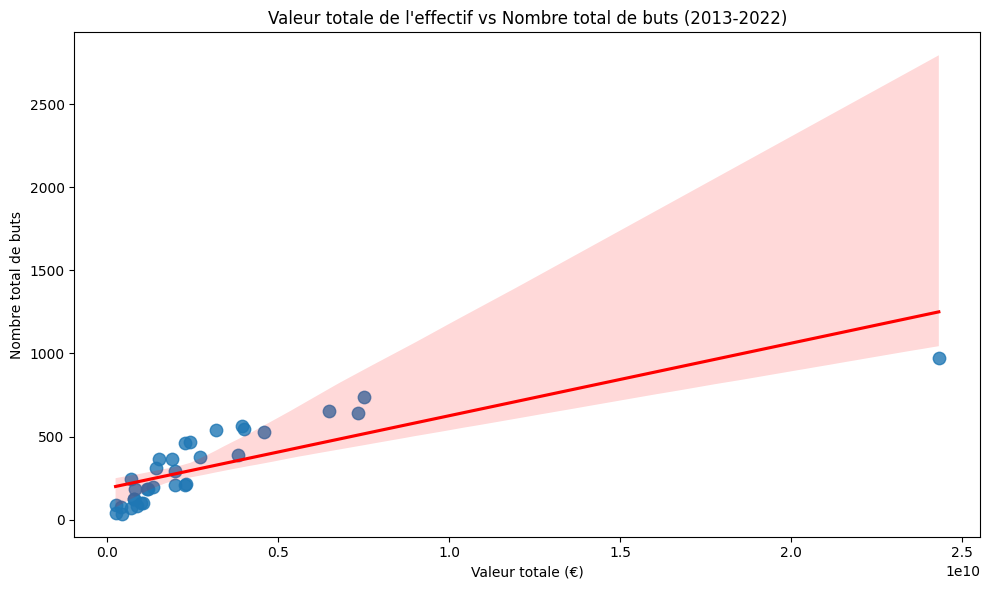

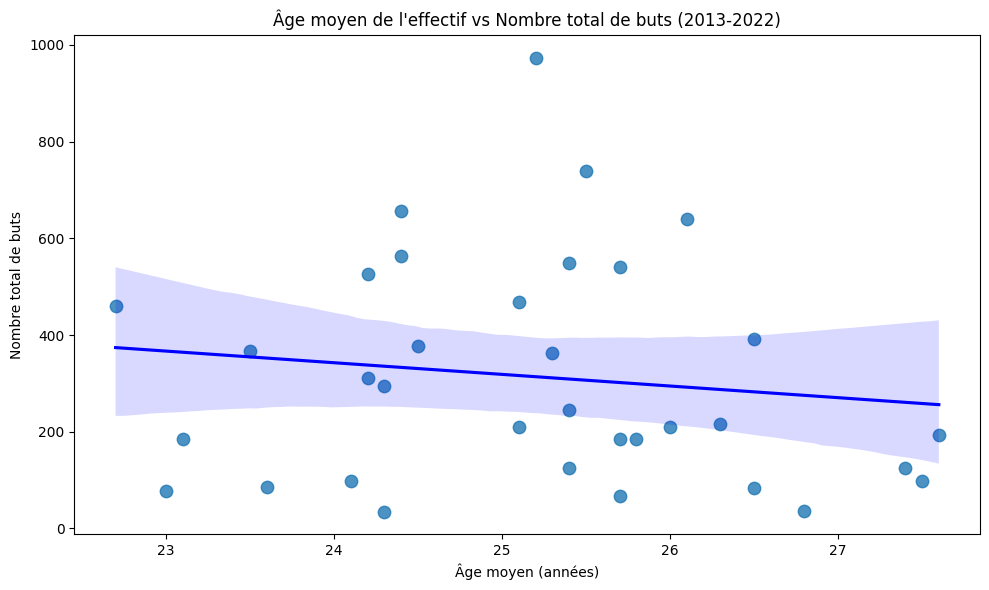

In [ ]:
# Valeur totale des joueurs par club
valeurs_clubs = player_valuation_before_season.groupby('current_club_id')['market_value_in_eur'].sum().reset_index()
valeurs_clubs.rename(columns={'current_club_id': 'club_id', 'market_value_in_eur': 'valeur_totale'}, inplace=True)

# Nombre total de buts par club (domicile + extérieur)
buts_domicile = matchs_2013_2022.groupby('home_club_id')['home_club_goals'].sum()
buts_exterieur = matchs_2013_2022.groupby('away_club_id')['away_club_goals'].sum()
buts_total = buts_domicile.add(buts_exterieur, fill_value=0).reset_index()
buts_total.columns = ['club_id', 'total_buts']

# Fusion des données valeur et buts
df_valeur_buts = pd.merge(valeurs_clubs, buts_total, on='club_id', how='inner')

# Graphique valeur vs buts
plt.figure(figsize=(10, 6))
sns.regplot(data=df_valeur_buts, x='valeur_totale', y='total_buts', scatter_kws={'s': 80}, line_kws={'color': 'red'})
plt.title("Valeur totale de l'effectif vs Nombre total de buts (2013-2022)")
plt.xlabel("Valeur totale (€)")
plt.ylabel("Nombre total de buts")
plt.tight_layout()
plt.show()

# Age moyen des clubs
age_moyen_clubs = clubs_fr[['club_id', 'average_age']]

# Fusion âge moyen et buts
df_age_buts = pd.merge(age_moyen_clubs, buts_total, on='club_id', how='inner')

# Graphique âge vs buts
plt.figure(figsize=(10, 6))
sns.regplot(data=df_age_buts, x='average_age', y='total_buts', scatter_kws={'s': 80}, line_kws={'color': 'blue'})
plt.title("Âge moyen de l'effectif vs Nombre total de buts (2013-2022)")
plt.xlabel("Âge moyen (années)")
plt.ylabel("Nombre total de buts")
plt.tight_layout()
plt.show()

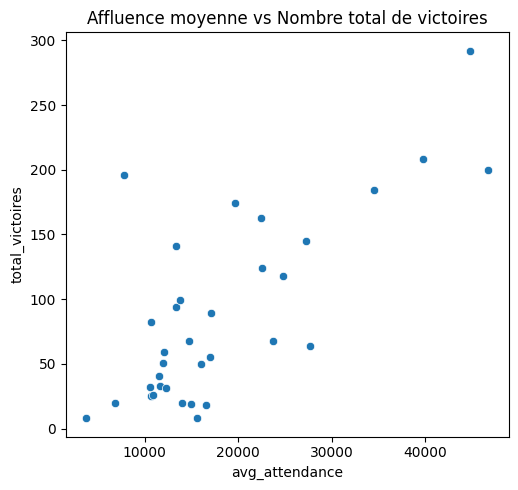

In [ ]:
# Nombre total de victoires par club
victoires_domicile = matchs_2013_2022[matchs_2013_2022['home_club_goals'] > matchs_2013_2022['away_club_goals']]
victoires_domicile = victoires_domicile.groupby('home_club_id').size()

victoires_exterieur = matchs_2013_2022[matchs_2013_2022['away_club_goals'] > matchs_2013_2022['home_club_goals']]
victoires_exterieur = victoires_exterieur.groupby('away_club_id').size()

victoires_total = victoires_domicile.add(victoires_exterieur, fill_value=0).reset_index()
victoires_total.columns = ['club_id', 'total_victoires']


# Affluence moyenne au stade par club (domicile uniquement)
affluence = matchs_2013_2022.groupby('home_club_id')['attendance'].mean().reset_index()
affluence.rename(columns={'home_club_id': 'club_id', 'attendance': 'avg_attendance'}, inplace=True)

# Fusion des données
df = victoires_total.merge(affluence, on='club_id', how='left')

df[['avg_attendance']] = df[['avg_attendance']].fillna(0)

# Visualisation
plt.figure(figsize=(15,5))

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='avg_attendance', y='total_victoires')
plt.title('Affluence moyenne vs Nombre total de victoires')

plt.tight_layout()
plt.show()

## Data Preprocessing

Cette étape va nous permettre de pouvoir réaliser des prédictions efficaces car nous allons travailler avec un fichier csv nettoyé, contenant toutes les informations nécessaires sans doublons.


### Erreurs et corrections

Pour la gestion du preprocessing nous avons eu quelques soucis :
- Au départ nous avons quelques problèmes de leakage (on prédisait le resultat du match avec les buts du match...), ce soucis a été rapidement réglé.
- Ensuite nous avons créée tout un tas de variables comprenant les données du match précédent de l'équipe et de la composition des équipes lors du match. Nous utilisions donc la forme du moment de l'équipe ainsi que son classement avant le début de la rencontre. Ainsi nous avons pu arriver à des modèles précis 70% du temps ... Mais nous nous sommes rendus compte que nous n'avions pas les données nécessaires en 2023 pour utiliser ces modèles...
- Nous avons donc refait tout le preprocessing en fonction de l'année N-1, c'est-à-dire si l'équipe a bien performé lors de l'année N-1, il y a de forte chances qu'elle performe également lors de l'année N. Nous avons créée une multitude de features permettant de mesurer cette performance en année N-1 et tenter de la corréler à l'année N. Nous avons agrémenter tout ça du score calculé du mannager (un mannager avec une bonne note est à la tête d'une bonne équipe logiquement), du nombre de spectateurs lors du match (si bcp de spectateurs = une grosse équipe à domicile <=> de fortes chances de victoires), de la météo, du jour de la semaine, etc.

### Création du dataset d'entraînement

Ici nous fabriquons notre dataset d'entrainement à l'aide des csv mis à notre disposition. Ceci nous permettra d'entrainer nos modèles.



In [ ]:
match_2023.columns

Index(['game_id', 'date', 'home_club_id', 'away_club_id',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'competition_type'],
      dtype='object')

In [ ]:
# Format date et saison
matchs_2013_2022["date"] = pd.to_datetime(matchs_2013_2022["date"])
match_2023["date"] = pd.to_datetime(match_2023["date"])
matchs_2013_2022["season"] = matchs_2013_2022["season"].astype(int)
match_2023["season"] = 2023

In [ ]:
# Concaténation
df_all = pd.concat([matchs_2013_2022, match_2023], ignore_index=True)
df_all = df_all.sort_values("date").reset_index(drop=True)

In [ ]:
# Fonction pour générer les features basées sur la saison précédente
def generate_features(df, clubs):
    features = []

    seasons = sorted(df["season"].unique())
    for season in seasons[1:]:  # À partir de 2014
        print(f"\n=== Saison {season} ===")
        prev_df = df[df["season"] == season - 1].copy()
        curr_df = df[df["season"] == season].copy()

        # Vérifications
        print(f"Nombre de matchs dans prev_df ({season-1}) :", len(prev_df))
        print(f"Nombre de matchs dans curr_df ({season}) :", len(curr_df))

        # Déterminer les victoires
        prev_df["home_win"] = (prev_df["home_club_goals"] > prev_df["away_club_goals"]).astype(int)
        prev_df["away_win"] = (prev_df["away_club_goals"] > prev_df["home_club_goals"]).astype(int)

        # Stats HOME
        home = prev_df.groupby("home_club_id").agg(
            home_goals_scored=("home_club_goals", "sum"),
            home_goals_conceded=("away_club_goals", "sum"),
            home_matches=("game_id", "count"),
            home_wins=("home_win", "sum")
        ).rename_axis("club_id").reset_index()

        # Stats AWAY
        away = prev_df.groupby("away_club_id").agg(
            away_goals_scored=("away_club_goals", "sum"),
            away_goals_conceded=("home_club_goals", "sum"),
            away_matches=("game_id", "count"),
            away_wins=("away_win", "sum")
        ).rename_axis("club_id").reset_index()

        # Fusion des stats club
        club_stats = pd.merge(home, away, on="club_id", how="outer").fillna(0)
        club_stats["total_matches"] = club_stats["home_matches"] + club_stats["away_matches"]
        club_stats["total_goals_scored"] = club_stats["home_goals_scored"] + club_stats["away_goals_scored"]
        club_stats["total_goals_conceded"] = club_stats["home_goals_conceded"] + club_stats["away_goals_conceded"]
        club_stats["total_wins"] = club_stats["home_wins"] + club_stats["away_wins"]
        club_stats["win_rate"] = club_stats["total_wins"] / club_stats["total_matches"]
        club_stats["avg_goals_scored"] = club_stats["total_goals_scored"] / club_stats["total_matches"]
        club_stats["avg_goals_conceded"] = club_stats["total_goals_conceded"] / club_stats["total_matches"]

        # Vérification des absents
        prev_ids = set(prev_df["home_club_id"]).union(set(prev_df["away_club_id"]))
        curr_ids = set(curr_df["home_club_id"]).union(set(curr_df["away_club_id"]))
        missing = curr_ids - prev_ids
        print(f"Clubs sans historique en {season} :", missing)

        # Merge home
        club_stats_home = club_stats.rename(columns={col: f"home_{col}" for col in club_stats.columns if col != "club_id"})
        curr_df = curr_df.merge(club_stats_home, left_on="home_club_id", right_on="club_id", how="left").drop(columns=["club_id"])

        # Merge away
        club_stats_away = club_stats.rename(columns={col: f"away_{col}" for col in club_stats.columns if col != "club_id"})
        curr_df = curr_df.merge(club_stats_away, left_on="away_club_id", right_on="club_id", how="left").drop(columns=["club_id"])

        # Remplir les clubs sans historique avec 0
        for prefix in ["home_", "away_"]:
            col = f"{prefix}total_matches"
            stat_cols = [c for c in curr_df.columns if c.startswith(prefix)]
            curr_df.loc[curr_df[col].isnull(), stat_cols] = 0

        # Ajout des données statiques clubs
        static_cols = ['club_id', 'squad_size', 'average_age', 'foreigners_percentage',
                       'national_team_players', 'stadium_seats', 'net_transfer_record']
        club_static = clubs[static_cols].copy()

        curr_df = curr_df.merge(club_static.add_prefix("home_"), left_on="home_club_id", right_on="home_club_id", how="left")
        curr_df = curr_df.merge(club_static.add_prefix("away_"), left_on="away_club_id", right_on="away_club_id", how="left")

        # Features contextuelles
        curr_df["day_of_week"] = curr_df["date"].dt.dayofweek
        curr_df["month"] = curr_df["date"].dt.month
        curr_df["is_weekend"] = curr_df["day_of_week"].isin([5, 6]).astype(int)
        curr_df["same_manager"] = (curr_df["home_club_manager_name"] == curr_df["away_club_manager_name"]).astype(int)

        features.append(curr_df)

    return pd.concat(features, ignore_index=True)



df_final = generate_features(df_all, clubs_fr)


=== Saison 2013 ===
Nombre de matchs dans prev_df (2012) : 380
Nombre de matchs dans curr_df (2013) : 380
Clubs sans historique en 2013 : {162, 995, 855}

=== Saison 2014 ===
Nombre de matchs dans prev_df (2013) : 380
Nombre de matchs dans curr_df (2014) : 380
Clubs sans historique en 2014 : {1162, 347, 826}

=== Saison 2015 ===
Nombre de matchs dans prev_df (2014) : 380
Nombre de matchs dans curr_df (2015) : 380
Clubs sans historique en 2015 : {1420, 3558, 1095}

=== Saison 2016 ===
Nombre de matchs dans prev_df (2015) : 380
Nombre de matchs dans curr_df (2016) : 380
Clubs sans historique en 2016 : {2969, 347, 1159}

=== Saison 2017 ===
Nombre de matchs dans prev_df (2016) : 380
Nombre de matchs dans curr_df (2017) : 379
Clubs sans historique en 2017 : {1416, 667, 1095}

=== Saison 2018 ===
Nombre de matchs dans prev_df (2017) : 379
Nombre de matchs dans curr_df (2018) : 380
Clubs sans historique en 2018 : {1160, 1421}

=== Saison 2019 ===
Nombre de matchs dans prev_df (2018) : 380
N

In [ ]:
print(df_final['results'])

0       0.0
1       1.0
2       1.0
3      -1.0
4       1.0
       ... 
3963    NaN
3964    NaN
3965    NaN
3966    NaN
3967    NaN
Name: results, Length: 3968, dtype: float64


Colonnes non nécessaires

In [ ]:
df_final.drop(columns=['Unnamed: 0', 'home_club_goals','away_club_goals','home_club_position','away_club_position',
                       'home_club_formation','away_club_formation','aggregate'], inplace=True)

Une idée serait de donner une note a un mannager (puisque nous avons les mannagers en 2023 ET dans l'entrainement)

In [ ]:
notes_manager_home = (
    df_final
    .groupby(["home_club_id", "season", "home_club_manager_name"])['results']
    .sum()
    .reset_index()
    .groupby("home_club_manager_name")['results']
    .mean()
    .sort_values(ascending=False)
    .to_frame(name="average_result")
)

notes_manager_home.head()

,average_result
home_club_manager_name,
Unai Emery,14.500000
Thomas Tuchel,10.666667
Mauricio Pochettino,10.000000
Laurent Blanc,9.200000
Leonardo Jardim,7.666667


In [ ]:
notes_manager_away = (
    df_final
    .groupby(["away_club_id", "season", "away_club_manager_name"])["results"]
    .sum()
    .reset_index()
    .groupby("away_club_manager_name")['results']
    .mean()
    .sort_values(ascending=False)
    .to_frame(name="average_result")
)
notes_manager_away

,average_result
away_club_manager_name,
0,14.727273
Christian Bracconi,9.000000
Christophe Pélissier,9.000000
Bernard Blaquart,8.000000
Patrick Kisnorbo,8.000000
...,...
Thomas Tuchel,-6.000000
Mauricio Pochettino,-6.500000
Laurent Blanc,-6.600000


Nous remettons les notes des mannager sur 20 (notes de 0 à 20)

In [ ]:
max_matches = df_final.groupby(["season", "home_club_id"])["game_id"].count().max()
min_score = -max_matches
max_score = max_matches

notes_manager_home["score_home_manager"] = notes_manager_home["average_result"].apply(
    lambda x: ((x - min_score) / (max_score - min_score)) * 20
)
notes_manager_home["score_home_manager"] = notes_manager_home["score_home_manager"].round(2)
notes_manager_home = notes_manager_home[["score_home_manager"]]

notes_manager_home.head()

,score_home_manager
home_club_manager_name,
Unai Emery,12.54
Thomas Tuchel,11.87
Mauricio Pochettino,11.75
Laurent Blanc,11.61
Leonardo Jardim,11.35


On peut maintenant rajouter cette colonne dans notre dataset final

In [ ]:
df_final = df_final.merge(df_notes_manager_home, how="left", left_on="home_club_manager_name", right_index=True)
df_final = df_final.merge(df_notes_manager_away, how="left", left_on="away_club_manager_name", right_index=True)

On vérifie simplement ci-après qu'il n'y a pas de valeur manquantes

In [ ]:
df_final["game_id"].count() - df_final["score_home_manager"].count()

np.int64(0)

La constitution **récente** des équipes on fait sans car elles ne sont pas représentatives pour l'entraînement des modèles

In [ ]:
cols_to_drop = [c for c in df_final.columns if c.startswith("home_") or c.startswith("away_")]
cols_to_drop = [c for c in cols_to_drop if any(keyword in c for keyword in [
    "squad_size", "average_age", "foreigners_percentage",
    "national_team_players", "stadium_seats", "net_transfer_record","competition_type"
])]
df_final.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df_final.drop(columns=['competition_type', 'home_club_name', 'away_club_name'], inplace=True) # Colonnes inutiles

### Gestion des doublons et des valeurs manquantes

Ceci va nous permettre d'obtenir un fichier beaucoup plus propre avec uniquement des données totalement exploitable.

In [ ]:
doublons = df_final[df_final.duplicated(keep=False)]
print(f"Nombre de lignes dupliquées : {doublons.shape[0]}")
print(doublons)

Nombre de lignes dupliquées : 0
Empty DataFrame
Columns: [game_id, season, round, date, home_club_id, away_club_id, home_club_manager_name, away_club_manager_name, stadium, attendance, referee, results, home_home_goals_scored, home_home_goals_conceded, home_home_matches, home_home_wins, home_away_goals_scored, home_away_goals_conceded, home_away_matches, home_away_wins, home_total_matches, home_total_goals_scored, home_total_goals_conceded, home_total_wins, home_win_rate, home_avg_goals_scored, home_avg_goals_conceded, away_home_goals_scored, away_home_goals_conceded, away_home_matches, away_home_wins, away_away_goals_scored, away_away_goals_conceded, away_away_matches, away_away_wins, away_total_matches, away_total_goals_scored, away_total_goals_conceded, away_total_wins, away_win_rate, away_avg_goals_scored, away_avg_goals_conceded, day_of_week, month, is_weekend, same_manager, score_home_manager, average_result]
Index: []

[0 rows x 48 columns]


Aucun doublon

In [ ]:
missing_per_col = df_final.isnull().sum()
missing_with_values = missing_per_col[missing_per_col > 0]

print(missing_with_values)

round         270
attendance    340
results       270
dtype: int64


De nombreuses valeures sont manquantes pour l'attendance. Afin de ne pas perdre de données à cause de ces valeurs manquantes nous avons décidé de les compléter de la manière suivante :   
Puisque nous avons tout de même les noms des stades même lorsque l'attendance est une valeur manquante, nous allons remplir ces valeurs manquantes par la médiane de la capacité des stades en questions

In [ ]:
# Avant toute imputation, on stocke un masque des lignes à remplir (pour faciliter l'affichage ensuite)
mask_missing_att = df_final['attendance'].isna()

stadium_medians = df_final.groupby('stadium')['attendance'].median()

df_final['attendance'] = df_final.groupby('stadium')['attendance'].transform(lambda x: x.fillna(x.median()))

imputed = df_final.loc[mask_missing_att, ['game_id', 'stadium', 'attendance']].rename(columns={'attendance': 'imputed_attendance'})

imputed.head(400)

,game_id,stadium,imputed_attendance
13,2353767,Stade du Ray,14962.0
20,2330834,Stade Louis-II,7025.0
158,2330960,Stade François-Coty,6721.0
660,2482388,Allianz Riviera,20175.5
673,2482396,Stade Armand-Cesari,12241.0
...,...,...,...
3301,3589588,Stade Geoffroy-Guichard,28039.0
3812,4094648,Stade de la Mosson,12532.0
3822,4094660,Orange Vélodrome,51279.0
3906,4094789,Stade Gabriel-Montpied,11010.0


In [ ]:
missing_per_col = df_final.isnull().sum()
missing_with_values = missing_per_col[missing_per_col > 0]

print(missing_with_values)

round         270
attendance      2
results       270
dtype: int64


Il reste 2 valeurs manquantes pour l'attendance nous allons analyser ce problème.

In [ ]:
mask_missing_att = df_final['attendance'].isna()

imputed = df_final.loc[mask_missing_att, ['game_id', 'stadium', 'attendance']].rename(columns={'attendance': 'imputed_attendance'})

imputed.head(400)

,game_id,stadium,imputed_attendance
1481,2735623,Stade Parsemain,NaN
1505,2735645,Stade Parsemain,NaN


Cela ne fonctionne pas, le stade Parsemain a une capacité de 12500 places, on va donc remplir à la maine les 2 valeurs manquantes à 12 000

In [ ]:
df_final['attendance'] = df_final['attendance'].fillna(12000)

In [ ]:
df_final.drop(columns=['round'], inplace=True)

In [ ]:
missing_per_col = df_final.isnull().sum()
missing_with_values = missing_per_col[missing_per_col > 0]

print(missing_with_values)

results    270
dtype: int64


Nous n'avons plus de valeurs manquantes ! Nous pouvons donc passer à l'étape suivante.

### Labellisation des variables non-numériques

In [ ]:
non_numeric_cols = df_final.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numeric_cols)

Index(['date', 'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'referee', 'day_of_week', 'month'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_cols = df_final.select_dtypes(include=['object']).columns.tolist()
print("Colonnes catégorielles :", cat_cols)

for col in cat_cols:
    le = LabelEncoder()
    df_final[col] = df_final[col].astype(str).fillna("Missing")  # conversion explicite en str
    df_final[col] = le.fit_transform(df_final[col])


non_numeric_cols = df_final.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numeric_cols)

Colonnes catégorielles : ['home_club_manager_name', 'away_club_manager_name', 'stadium', 'referee']
Index(['date', 'day_of_week', 'month'], dtype='object')


Le preprocessing est fini ! Nous pouvons passer à la suite

## Correlations

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

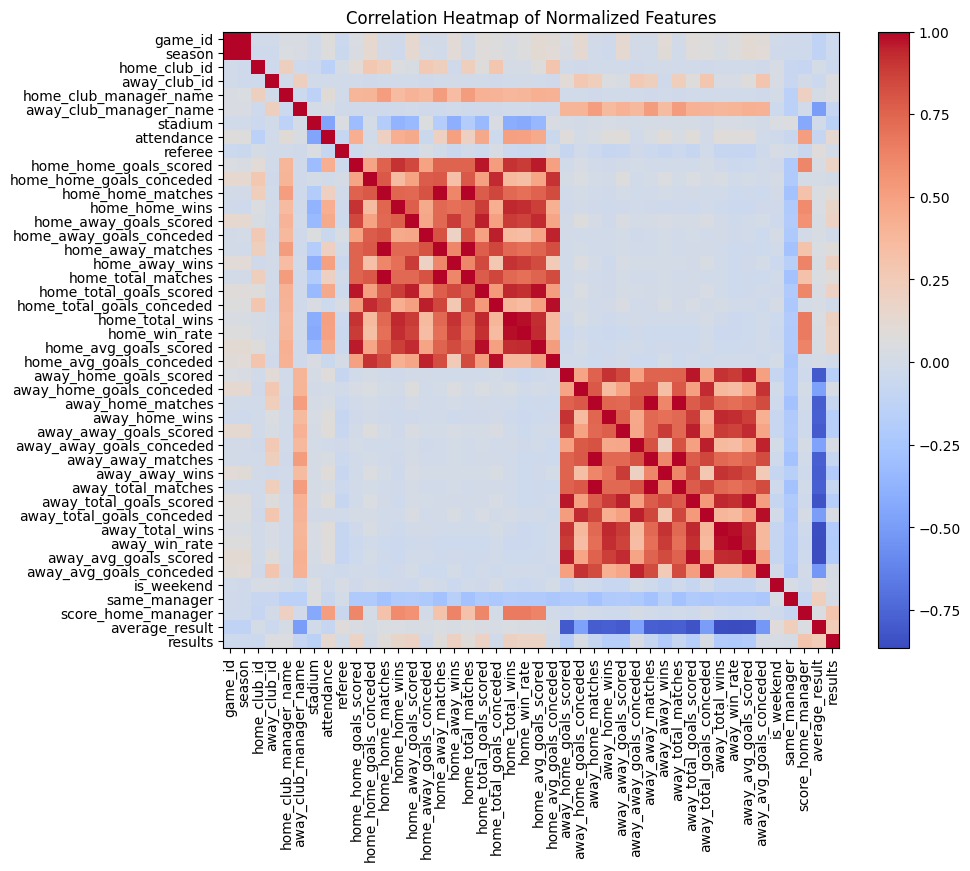

In [ ]:
# On normalise les variables avant de créer la heatmap
target_col = 'results'

numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).drop(columns=[target_col])
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns)
data_train_scaled = pd.DataFrame(numerical_columns_scaled, columns=numerical_columns.columns, index=df_final.index)
data_train_scaled[target_col] = df_final[target_col]
correlations = data_train_scaled.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Heatmap of Normalized Features')
plt.show()

Affichage des correlations des colonnes par ordre décroissant

In [ ]:
corr_matrix = correlations
corr_with_target = corr_matrix['results'].drop('results')
top = corr_with_target.reindex(corr_with_target.abs().sort_values(ascending=False).index).head(500)
top_df = top.reset_index()
top_df.columns = ['feature', 'corr_with_results_x']
print(top_df)

                      feature  corr_with_results_x
0          score_home_manager             0.290420
1              average_result             0.238620
2               away_win_rate            -0.208253
3              home_away_wins             0.198955
4              away_away_wins            -0.198411
5             away_total_wins            -0.195650
6             home_total_wins             0.192191
7     home_total_goals_scored             0.190134
8       away_avg_goals_scored            -0.187766
9      home_away_goals_scored             0.184984
10              home_win_rate             0.183436
11      home_avg_goals_scored             0.182742
12     home_home_goals_scored             0.180922
13    away_total_goals_scored            -0.174546
14     away_away_goals_scored            -0.171628
15             away_home_wins            -0.166285
16     away_home_goals_scored            -0.164626
17             home_home_wins             0.160045
18                    stadium  

In [ ]:
significant_corr = top_df[top_df['corr_with_results_x'].abs() > 0.1]

print(significant_corr)

                    feature  corr_with_results_x
0        score_home_manager             0.290420
1            average_result             0.238620
2             away_win_rate            -0.208253
3            home_away_wins             0.198955
4            away_away_wins            -0.198411
5           away_total_wins            -0.195650
6           home_total_wins             0.192191
7   home_total_goals_scored             0.190134
8     away_avg_goals_scored            -0.187766
9    home_away_goals_scored             0.184984
10            home_win_rate             0.183436
11    home_avg_goals_scored             0.182742
12   home_home_goals_scored             0.180922
13  away_total_goals_scored            -0.174546
14   away_away_goals_scored            -0.171628
15           away_home_wins            -0.166285
16   away_home_goals_scored            -0.164626
17           home_home_wins             0.160045
18                  stadium            -0.142850
19               att

## Modèles de prédictions

In [ ]:
data_train = df_final[(df_final['season'] >= 2014) & (df_final['season'] <= 2022)]

### Modèle de Machine Learning Classique

#### Modèle 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [ ]:
# Pour afficher un comparatif des modèles
results = []

Accuracy: 0.348
Mean Squared Error: 0.621


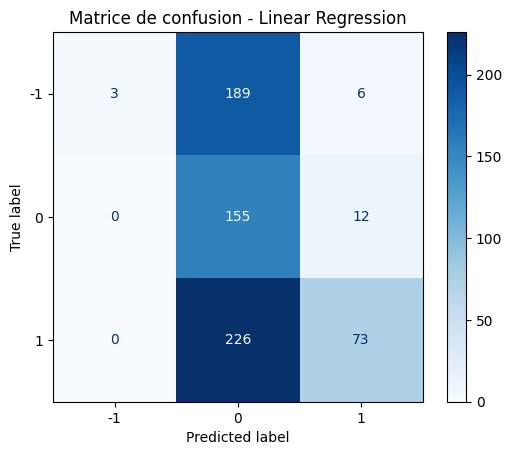

In [ ]:
features = top_df[top_df['corr_with_results_x'].abs() > 0.1]['feature']
X = data_train[features].copy()

y = data_train['results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

y_pred_class = np.rint(y_pred).astype(int)

y_pred_class = np.clip(y_pred_class, -1, 1)

acc = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {acc:.3f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

cm = confusion_matrix(y_test, y_pred_class, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()

results.append({'model': 'model_1 : Linear Regression', 'accuracy': acc, 'mse': mse})

Ce modèle ne prédis quasiment que des matchs nuls et est proche de l'aléatoire

### Perceptron

#### Modèle 2

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Accuracy: 0.463855421686747
MSE: 1.3674698795180722


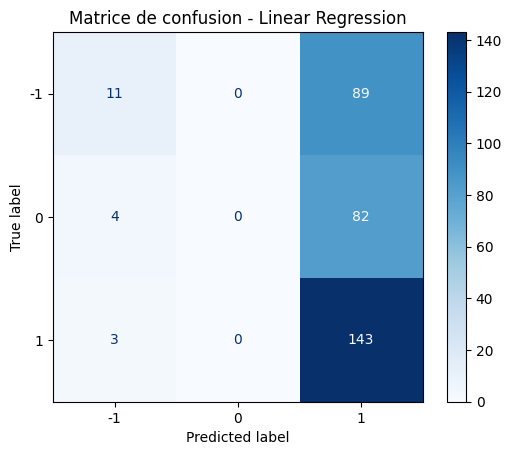

In [ ]:
X = data_train.drop(columns=['results', 'date'])
y = data_train['results']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

pipeline_2 = make_pipeline(
    StandardScaler(),
    Perceptron(max_iter=1000, tol=1e-3, random_state=42)
)

param_grid = {
    'perceptron__penalty': [None, 'l2', 'l1', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 0.1],
    'perceptron__fit_intercept': [True, False],
    'perceptron__shuffle': [True, False],
    'perceptron__eta0': [1.0, 0.1, 0.01],  # Taux d’apprentissage initial
    'perceptron__early_stopping': [False, True],
}

grid_search = GridSearchCV(
    pipeline_2,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

model_2 = grid_search.best_estimator_

y_pred = model_2.predict(X_test)

acc = model_2.score(X_test, y_test)
print("Accuracy:", acc)

y_pred = model_2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_2 : Perceptron', 'accuracy': acc, 'mse': mse})

Ce modèle est légèrement meilleur, on voit qu'il a plus tendance à prédire des victoires et des matchs nuls

### Modèle MLP (Multi-Layer Perceptron)

#### Modèle 3

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer

In [ ]:
def custom_accuracy(y_true, y_pred):
    y_pred_class = np.rint(y_pred).astype(int)
    y_pred_class = np.clip(y_pred_class, -1, 1)
    return accuracy_score(y_true, y_pred_class)

In [ ]:
accuracy_scorer = make_scorer(custom_accuracy, greater_is_better=True)

In [ ]:
X = data_train.drop(columns=['results', 'date'])

X = pd.get_dummies(X, drop_first=True)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.2)

mlp_reg = MLPRegressor(hidden_layer_sizes=[25, 25, 25], random_state=42, max_iter=4100)
model_3 = make_pipeline(StandardScaler(), mlp_reg)

model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_valid)

y_pred_class = np.rint(y_pred).astype(int)
y_pred_class = np.clip(y_pred_class, -1, 1)
acc = accuracy_score(y_valid, y_pred_class)
print(f"Accuracy: {acc:.3f}")

mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error:", mse)

results.append({'model': 'model_3 : MLP', 'accuracy': acc, 'mse': mse})

Accuracy: 0.405
Mean Squared Error: 1.199457755970256


### Support Vector Machine (SVM)

#### Modèle 4

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.536144578313253
MSE: 1.069277108433735


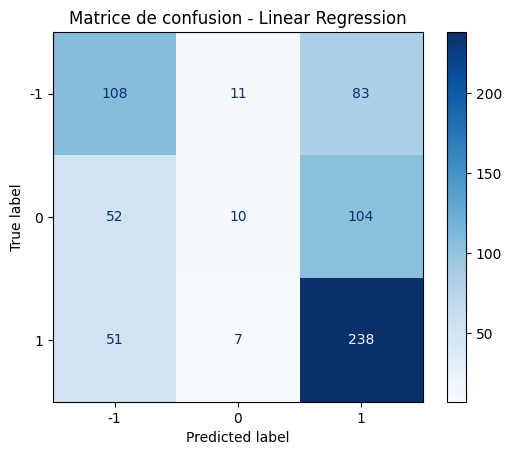

In [ ]:
pipeline_4 = make_pipeline(
    StandardScaler(),
    LinearSVC(
        max_iter=1000,
        tol=1e-4,
        random_state=42
    )
)

param_grid = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 100],
    'linearsvc__loss': ['squared_hinge'],  # seule perte disponible pour 'l2'
    'linearsvc__penalty': ['l2'],          # 'l1' nécessite dual=False, donc on reste sur 'l2'
    'linearsvc__dual': [True, False],      # tester les deux variantes
}

grid_search = GridSearchCV(
    pipeline_4,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

model_4 = grid_search.best_estimator_

y_pred = model_4.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

y_pred = model_4.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_4 : LinearSVC', 'accuracy': acc, 'mse': mse})

Ce modèle est déjà bien meilleur on a plus d'une chance sur deux d'obtenir le bon réssultat et ce modèle prédis essentiellement des victoires un peu moins de défaites mais quasiement aucune egalite

#### Modèle 5

In [ ]:
from sklearn.svm import SVC

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy: 0.5150602409638554
MSE: 1.1762048192771084


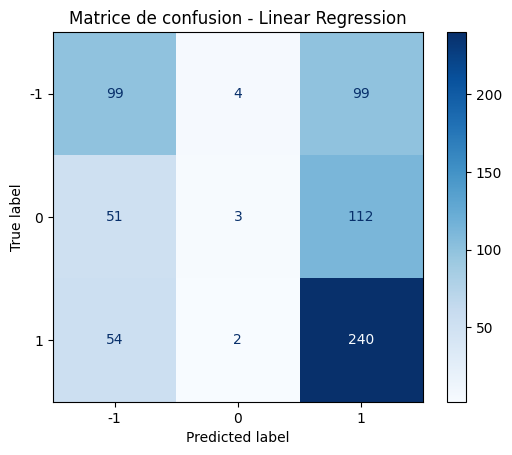

In [ ]:
pipeline_5 = make_pipeline(
    StandardScaler(),
    SVC()
)

# Remaraque : ici on aurait pu tester plus de possibilités maisnça prenait trop de temps à s'éxecuter
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale'],
}

grid_search = GridSearchCV(
    pipeline_5,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)

model_5 = grid_search.best_estimator_

y_pred = model_5.predict(X_test)
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:", acc)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_5 : SVC classique', 'accuracy': acc, 'mse': mse})

Comme précédemment on remarque qu'aucune égalité est prédite

### Arbre de décision

#### Modèle 6

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Accuracy: 0.4864457831325301
MSE: 1.055722891566265


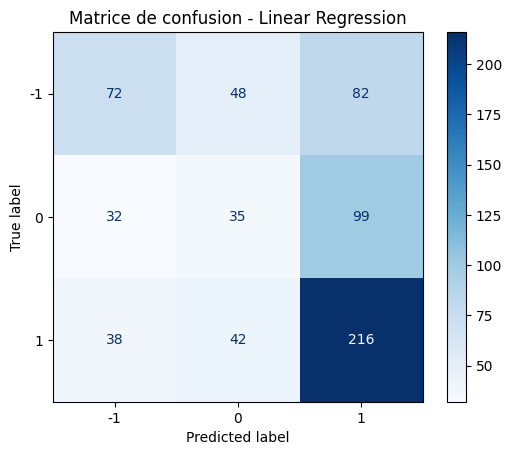

In [ ]:
pipeline_6 = make_pipeline(
    DecisionTreeClassifier(random_state=42)
)

param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20, 50],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 10],
}

grid_search = GridSearchCV(
    pipeline_6,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
model_6 = grid_search.best_estimator_

y_pred = model_6.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_6 : DecisionTreeClassifier', 'accuracy': acc, 'mse': mse})

Les tendances se gardent encore une fois avec ce modèle

In [ ]:
print("\nProbabilités prédictives pour X_test[0] :", model_6.predict_proba([X_test.iloc[0]]))


Probabilités prédictives pour X_test[0] : [[0.26666667 0.38787879 0.34545455]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


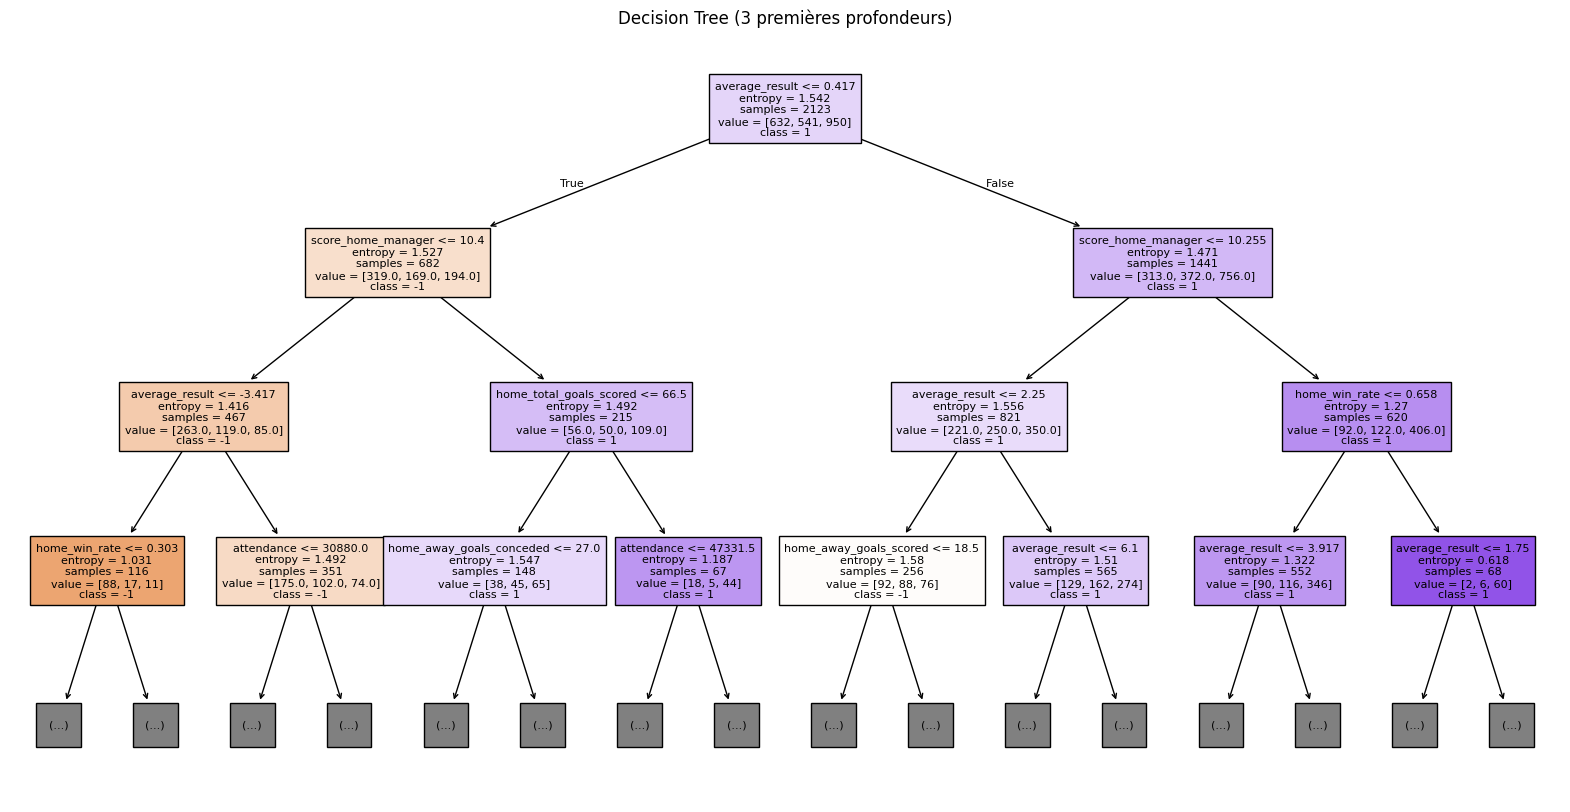

In [ ]:
tree_model = model_6.named_steps['decisiontreeclassifier']

# Tracer l’arbre
plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['-1','0','1'],
    filled=True,
    fontsize=8,
    max_depth=3       # on affiche que les 3 premiers niveaux
)
plt.title("Decision Tree (3 premières profondeurs)")
plt.show()

#### Modèle 7

In [ ]:
from sklearn import tree

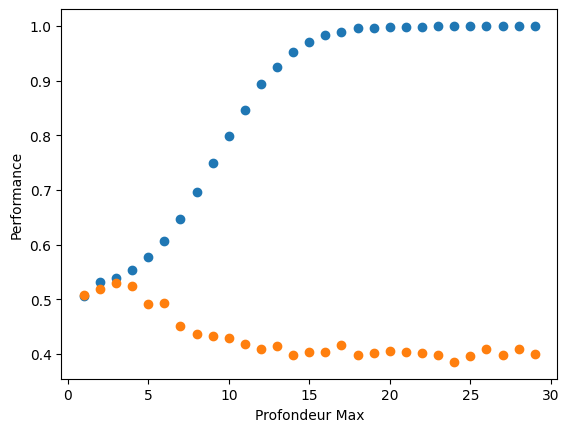

max_score  0.5301204819277109


In [ ]:
train_score = []
test_score = []

max_depth = 30

for i in range(1, max_depth):
    model = tree.DecisionTreeClassifier(splitter="best", min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, max_depth=i)

    model.fit(X_train,y_train)

    yhat_test = model.predict(X_test)
    yhat_train = model.predict(X_train)

    train_score.append(accuracy_score(yhat_train, y_train))
    test_score.append(accuracy_score(yhat_test, y_test))

    #print(f"Train score {accuracy_score(yhat_train, y_train)}, Test score {accuracy_score(yhat_test, y_test)}")

plt.scatter(range(1,max_depth), train_score)
plt.scatter(range(1, max_depth), test_score)
plt.xlabel("Profondeur Max")
plt.ylabel("Performance")
plt.show()

print("max_score ", np.max(test_score))

In [ ]:
model_7 = tree.DecisionTreeClassifier(splitter="best", min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, max_depth=3)

model_7.fit(X_train,y_train)

y_pred = model_7.predict(X_test)
yhat_train = model_7.predict(X_train)

print("Train score : ", (accuracy_score(yhat_train, y_train)))
print("Test score : ", (accuracy_score(y_pred, y_test)))

acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

Train score :  0.538860103626943
Test score :  0.5301204819277109
Accuracy : 0.5301204819277109
MSE: 1.1295180722891567


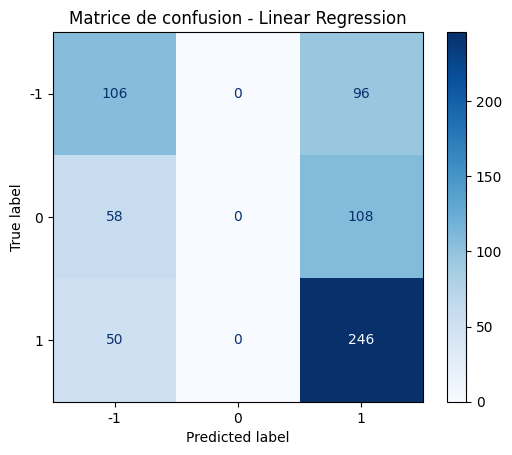

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()

results.append({'model': 'model_7 : Arbre de décision', 'accuracy': acc, 'mse': mse})

Ici, encore mêmes tendances

### Descente de gradient Stochastique

#### Modèle 8

In [ ]:
from sklearn.linear_model import SGDClassifier

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy : 0.5496987951807228
MSE: 1.0286144578313252


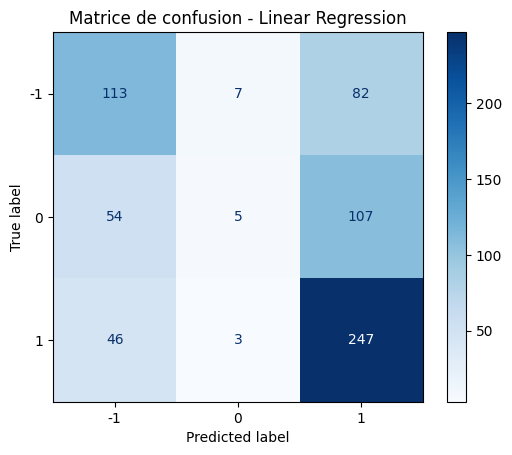

In [ ]:
pipeline_8 = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss='log_loss',
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
)

param_grid = {
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__alpha': [1e-4, 1e-3, 1e-2],
    'sgdclassifier__learning_rate': ['optimal', 'invscaling', 'adaptive'],
    'sgdclassifier__eta0': [0.01, 0.1, 1.0],  # taux d'apprentissage initial
}

grid_search = GridSearchCV(
    pipeline_8,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

model_8 = grid_search.best_estimator_

y_pred = model_8.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_8 : SGDClassifier log_loss', 'accuracy': acc, 'mse': mse})

Toujours les mêmes tendances

#### Modèle 9

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy : 0.5421686746987951
MSE: 1.0813253012048192


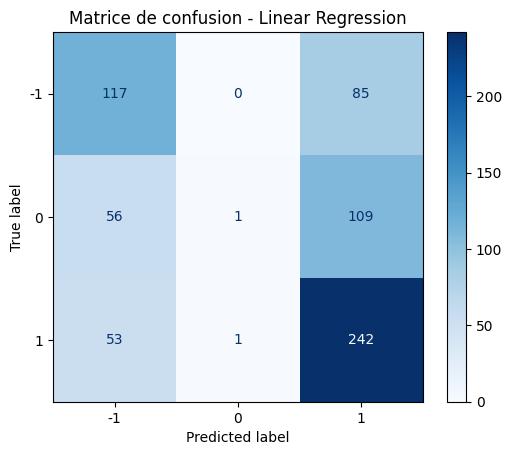

In [ ]:
pipeline_9 = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss='modified_huber',
        max_iter=1000,
        random_state=42,
        early_stopping=True
    )
)

param_grid = {
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__alpha': [1e-4, 1e-3, 1e-2],
    'sgdclassifier__learning_rate': ['optimal', 'invscaling', 'adaptive'],
    'sgdclassifier__eta0': [0.01, 0.1, 1.0],
}

grid_search = GridSearchCV(
    pipeline_9,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
model_9 = grid_search.best_estimator_

y_pred = model_9.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_9 : SGDClassifier modified_huber', 'accuracy': acc, 'mse': mse})

Encor et toujours les mêmes tendances de prédictions

### Régression logistique linéaire

#### Modèle 10

In [ ]:
from sklearn.linear_model import RidgeClassifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy : 0.5406626506024096
MSE: 1.055722891566265


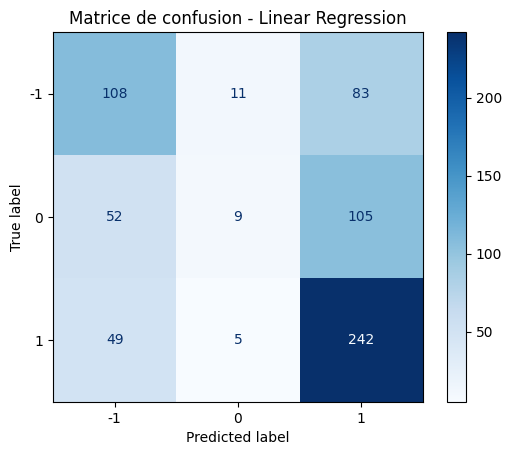

In [ ]:
pipeline_10 = make_pipeline(
    StandardScaler(),
    RidgeClassifier()
)

# Ici aussi on a du réduire les combinaisons pour le temps d'éxecution
param_grid = {
    'ridgeclassifier__alpha': [0.1, 1.0, 10.0],
    'ridgeclassifier__solver': ['auto', 'lsqr', 'saga'],
    'ridgeclassifier__fit_intercept': [True],
}

grid_search = GridSearchCV(
    pipeline_10,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)

model_10 = grid_search.best_estimator_

y_pred = model_10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({'model': 'model_10 : RidgeClassifier', 'accuracy': acc, 'mse': mse})

Encore et toujours les mêmes tendances

### XGB

#### Modèle 11

In [ ]:
import xgboost as xgb

In [ ]:
y = data_train['results'].map({-1: 0, 0: 1, 1: 2})  # décaler : -1→0, 0→1, 1→2
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_11 = make_pipeline(
    StandardScaler(),
    xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )
)

param_grid = {
    'xgbclassifier__max_depth': [3, 5],
    'xgbclassifier__learning_rate': [0.05, 0.1],
    'xgbclassifier__n_estimators': [100],
    'xgbclassifier__subsample': [0.8],
    'xgbclassifier__colsample_bytree': [0.8]
}

grid_search = GridSearchCV(
    pipeline_11,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
model_11 = grid_search.best_estimator_


y_pred_raw = model_11.predict(X_test)
y_pred = pd.Series(y_pred_raw).map({0: -1, 1: 0, 2: 1}).values

y_test_decoded = y_test.map({0: -1, 1: 0, 2: 1})

acc = accuracy_score(y_test_decoded, y_pred)
print("Accuracy :", acc)

mse = mean_squared_error(y_test_decoded, y_pred)
print("MSE:", mse)

results.append({'model': 'model_11 : XGBoost', 'accuracy': acc, 'mse': mse})

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:02:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy : 0.5225903614457831
MSE: 1.0828313253012047


### Random Forest

#### Modèle 12

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline_12 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )
)

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [20, 50],
    'randomforestclassifier__min_samples_leaf': [2, 5],
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(
    pipeline_12,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
model_12 = grid_search.best_estimator_

y_pred_raw = model_12.predict(X_test)
y_pred = pd.Series(y_pred_raw).map({0: -1, 1: 0, 2: 1}).values
y_test_decoded = y_test.map({0: -1, 1: 0, 2: 1})

acc = accuracy_score(y_test_decoded, y_pred)
print("Random Forest Accuracy :", acc)

mse = mean_squared_error(y_test_decoded, y_pred)
print("MSE:", mse)

results.append({'model': 'model_12 : Random Forest', 'accuracy': acc, 'mse': mse})

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest Accuracy : 0.4864457831325301
MSE: 1.1731927710843373


#### Modèle 13

In [ ]:
from sklearn.linear_model import LogisticRegression

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Accuracy 0.5388479571332887
Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Logistic Regression Accuracy: 0.5753012048192772
MSE: 0.8855421686746988


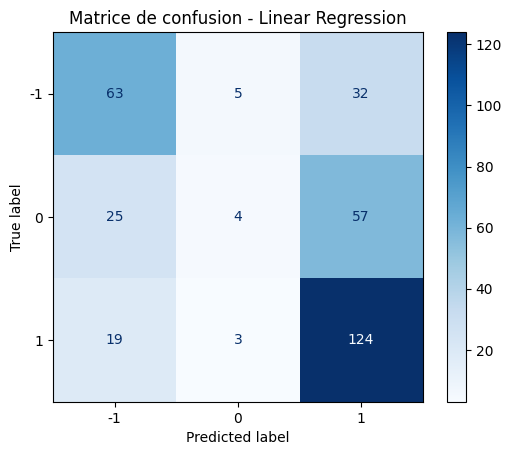

In [ ]:
X = data_train.drop(columns=['results', 'date'])
y = data_train['results']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

param_grid = {
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__solver': [
        'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga', 'newton-cholesky'
    ]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

model_13 = grid_search.best_estimator_

y_pred = model_13.predict(X_test)

acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

train_acc = accuracy_score(y_train, model_13.predict(X_train))
print("Train Accuracy", train_acc)

print("Best Parameters:", grid_search.best_params_)
print("Logistic Regression Accuracy:", acc)
print("MSE:", mse)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Linear Regression")
plt.show()
results.append({
    'model': 'model_13 Logistic Regression',
    'accuracy': acc,
    'mse': mse
})

Toujours la même tendance

### ACP

Nous allons créer une ACP et re-créer des modèles SVM

#### Modèle 14

In [ ]:
from sklearn.decomposition import PCA

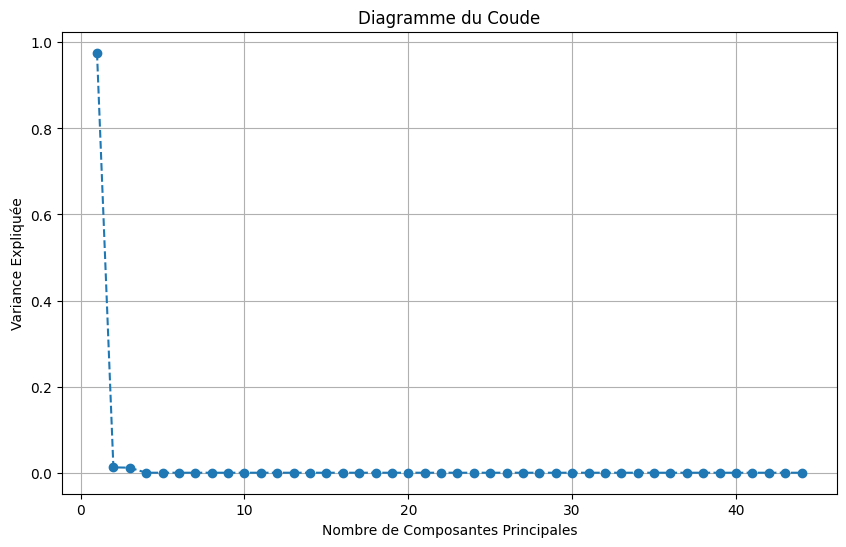

In [ ]:
df_pca = df_final.drop(columns=["date"])

features = df_pca.drop(columns=["results"]).columns

pca = PCA()
pca.fit(df_pca.drop(columns=["game_id","results"]))

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Expliquée')
plt.title('Diagramme du Coude')
plt.grid()
plt.show()

On choisit donc n_components = 2

In [ ]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)
print(X_pca.shape)

(3318, 2)


<ipython-input-86-61b901a41740>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


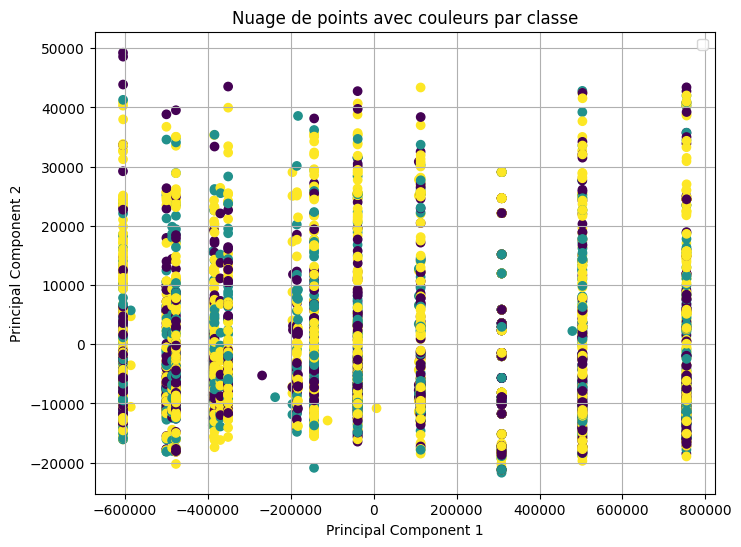

In [ ]:
# Tracer le nuage de points en utilisant les couleurs selon y_test
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

plt.title('Nuage de points avec couleurs par classe')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Fitting 3 folds for each of 4 candidates, totalling 12 fits


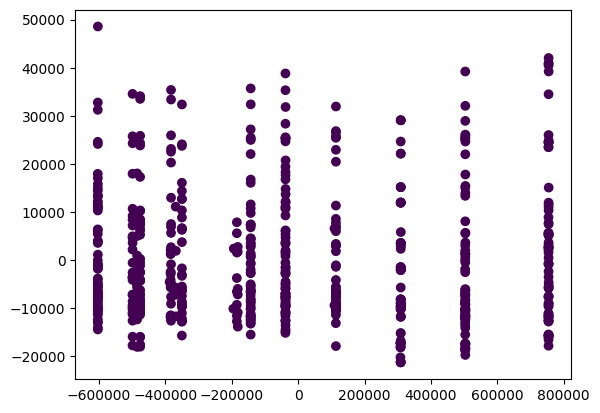

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state =0)

param_grid = {
    'C': [1, 10],
    'degree': [2, 3],
    'coef0': [0.0],
    'gamma': ['scale']
}

grid_search = GridSearchCV(
    svm.SVC(kernel='poly'),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

model_14 = grid_search.best_estimator_

y_pred=model_14.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

results.append({'model': 'model_14 : ACP + SVM Polynomial', 'accuracy': acc, 'mse': mse})

Accuracy: 0.4503012048192771
MSE: 1.444277108433735


Vraisemblablement, la PCA n'améliorera pas l'accuracy, même si évidemment, en réduisant le nombre de features, elle réduirait le temps d'éxécution

## Comparaison des modèles

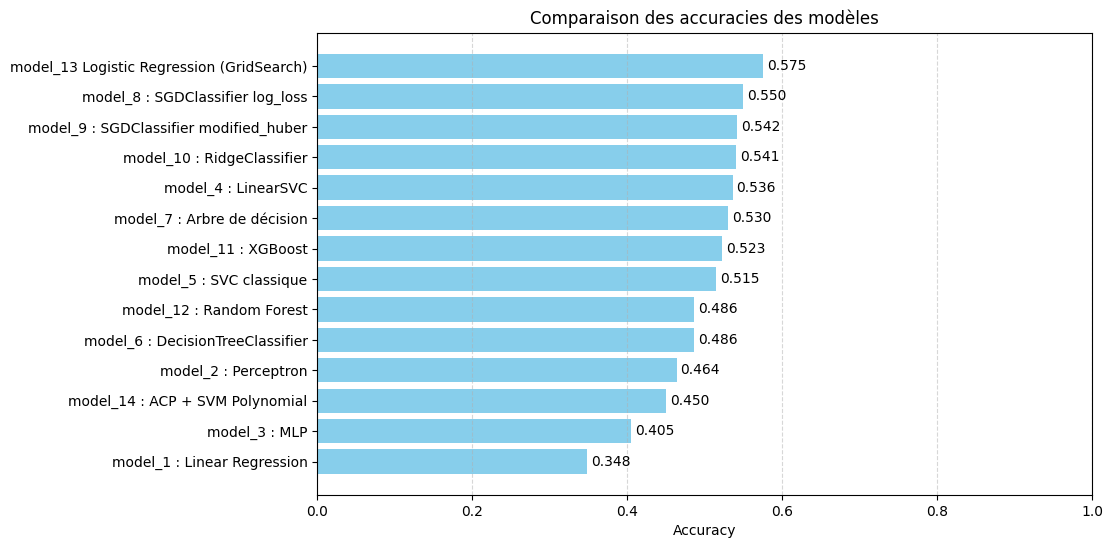

In [ ]:
df_results = pd.DataFrame(results).sort_values('accuracy', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_results['model'], df_results['accuracy'], color='skyblue')

for bar, acc in zip(bars, df_results['accuracy']):
    plt.text(
        bar.get_width() + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{acc:.3f}",
        va='center'
    )

plt.xlabel('Accuracy')
plt.title('Comparaison des accuracies des modèles')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
for model, acc in df_results[['model', 'accuracy']].values:
    print(f"{model} : Accuracy = {acc:.3f}")

model_13 Logistic Regression (GridSearch) : Accuracy = 0.575
model_8 : SGDClassifier log_loss : Accuracy = 0.550
model_9 : SGDClassifier modified_huber : Accuracy = 0.542
model_10 : RidgeClassifier : Accuracy = 0.541
model_4 : LinearSVC : Accuracy = 0.536
model_7 : Arbre de décision : Accuracy = 0.530
model_11 : XGBoost : Accuracy = 0.523
model_5 : SVC classique : Accuracy = 0.515
model_12 : Random Forest : Accuracy = 0.486
model_6 : DecisionTreeClassifier : Accuracy = 0.486
model_2 : Perceptron : Accuracy = 0.464
model_14 : ACP + SVM Polynomial : Accuracy = 0.450
model_3 : MLP : Accuracy = 0.405
model_1 : Linear Regression : Accuracy = 0.348


## Analyse des résultats des modèles

### Matrices de confusions

Les résultats des matrices de confusions nous indiquent que selon les modèles, les matchs nuls sont rares, alors évidemment dans la réalité ils ne sont pas tant rares que ça mais cela reste la plus rare des 3 issues (environ 26% des matchs se terminent en nuls)  
   
Cette tendance peut s'expliquer par nos features crééent qui potentiellement mettent trop l'accent sur la victoire ou la défaite (comme win_rate par exxemple) mais il est important de noter qu'il est difficile de prédire un match nul (si une équipe est supposée meilleure que l'autre, le modèle prédira une victoire, ce qui semble logique)

### Accuracy

D'après le graphe ci-dessus nous pouvons constater que les modèles que nous avons implémentés ont une accuracy variant de 0.348 à 0.575.  
  
Il est normal que nous n'ayons pas d'accuracy très hautes à 0.8 ou plus comme cela peut parfois être le cas dans d'autres situations car les matchs de foot restent des évènements aléatoires.  
  
D'autant plus que nous n'avons quasiment aucune information sur les matchs de 2023, c'est comme si l'on prédisait les résultats de tous les matchs de la saison avant la saison, donc aucune information sur la forme actuelle de l'équipe, leurs composition d'avant-match, etc.   
On ne peut qu'utiliser les données des années précédentes.  
   
Un modèle avec la composition des équipes, et les résultats du match précédent peut monter à 70% (nous le savons car nous avions fait cette erreur à la base)
  
Notre meilleur modèle est le modèle 13: Logistic regretion. Pour prédire les matchs de 2023 nous avons donc logiquement choisi d'utiliser ce modèle

## Prédictions résultat final

In [ ]:
data_pred = df_final[df_final['season'] == 2023]

In [ ]:
X_train = data_train.drop(columns=['results', 'date'])
y_train = data_train['results']

# Recrée X_pred avec les mêmes colonnes que X_train
X_pred = data_pred[X_train.columns].copy()  # Ne pas inclure 'results' ni 'date'

# Faire les prédictions
y_pred = model_13.predict(X_pred)
y_pred_class = np.rint(y_pred).astype(int)
y_pred_class = np.clip(y_pred_class, -1, 1)

# Construction du DataFrame final
df_results = pd.DataFrame({
    'game_id': data_pred['game_id'].values,
    'results': y_pred_class
})

# Enregistrement
df_results.to_csv("predictions_2023.csv", index=False)
print("Prédictions enregistrées dans predictions_2023.csv")

Prédictions enregistrées dans predictions_2023.csv


In [ ]:
print(df_final['results'].value_counts().sort_index())

results
-1.0    1101
 0.0     965
 1.0    1632
Name: count, dtype: int64


In [ ]:
print(df_results['results'].value_counts().sort_index())

results
-1    168
 0      3
 1     99
Name: count, dtype: int64


Comme le montraient les matrices de confusions, on prédis beaucoup de victoires, légèrement moins de défaites et très peu de matchs nuls.